In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
import math
from sklearn.model_selection import train_test_split
# Build the Regression / Regressor models
import regex as re
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Phase 3&4

# Clothing Date Machine Learning Model developement

3 different tables table 1 table 2 table 3 were extracted from disparate clothing website sources using webscraping techniques.
Now using the tables we will join them together and start with EDA and develop a Machien Learning model to  make predictions of price and occasion.

In [2]:
# Table1 contains Brandname,category,Producttype,ProductName,ProductCode,Price
table1=pd.read_csv("Table1.csv")
table1.head()

,SNo,Brandname,Category,Producttype,ProductName,ProductCode,Price
0,1,Monte Carlo,men,polo-t-shirts,Men Grey Stripe Polo Collar Half Sleeve T-Shirt,224064239-1,"Rs. 1,695.00"
1,2,Monte Carlo,men,polo-t-shirts,Men Pink Stripe Polo Collar Half Sleeve T-Shirt,224064114-1,"Rs. 1,345.00"
2,3,Monte Carlo,men,polo-t-shirts,Men White Stripe Polo Collar Half Sleeve T-Shirt,224064161-1,"Rs. 1,490.00"
3,4,Monte Carlo,men,polo-t-shirts,Men Lime Green Solid Polo Collar Half Sleeve T...,22403651-5,"Rs. 1,190.00"
4,5,Monte Carlo,men,polo-t-shirts,Men Blue Stripe Polo Collar Half Sleeve T-Shirt,224064150-1,"Rs. 1,440.00"


In [3]:
# Replacing boys and girls with Kids and men and women with Men and Women
table1['Category'].replace({'men':'Men','women':'Women','boys':'Kids','girls':'Kids'},inplace=True)


In [4]:
# Standardising Price column
table1['Price'] = table1['Price'].str.replace(',', '')
table1['Price']=table1['Price'].str.extract(r'([0-9]+\.[0-9]+)').astype(float)
table1['Price'] = table1['Price'].apply(lambda x: '{:.2f}'.format(x))

In [5]:
# Fillna with mean Price
table1['Price']=table1['Price'].astype(float)
table1['Price'].fillna(math.ceil(table1.Price.mean()),inplace=True)

In [6]:
# Standardising Product Type
table1.Producttype.unique()
table1['Producttype'].replace({'polo-t-shirts':'Polos and T-shirts','polo-shirts':'Polos and T-shirts',
                               'shirts':'Shirts','shorts':'Shorts and Bermuda','sweatshirts':'Sweatshirts','sweater':
                               'Sweaters and Cardigans','tops':'Tops','jackets':'Jacket','Kurta Pajama':'Kurta'},inplace=True)


In [7]:
table1.isna().sum()

SNo            0
Brandname      0
Category       0
Producttype    0
ProductName    0
ProductCode    0
Price          0
dtype: int64

No Nulls in table1

In [8]:
# Table2 contains Weatype,Material,color
table2=pd.read_csv("Table2.csv")
table2.head()

,SNo,Weartype,Material,color
0,1,Topwear,Cotton Blend,Grey
1,2,Topwear,Cotton Blend,Pink
2,3,Topwear,Cotton Blend,White
3,4,Topwear,Cotton Blend,Lime Green
4,5,Topwear,Cotton Blend,Blue


In [9]:
table2.isna().sum() # 99 null color
# Handling null color
table2['color'].fillna(table2['color'].mode()[0],inplace=True)

In [10]:
# Table2 contains Size,Country,return,Occasion
table3=pd.read_csv("Table3.csv")
table3.head()

,SNo,Size,Country,return,Occasion
0,1,"36/S,38/M,40/L,42/XL,44/XXL,46/3XL",India,7 days,Casual
1,2,"36/S,38/M,40/L,42/XL,44/XXL,46/3XL",India,7 days,Casual
2,3,"36/S,38/M,40/L,42/XL,44/XXL,46/3XL",India,7 days,Casual
3,4,"36/S,38/M,40/L,42/XL,44/XXL,46/3XL",India,7 days,Casual
4,5,"36/S,38/M,40/L,42/XL,44/XXL,46/3XL",India,7 days,Casual


In [11]:
table3['return'].unique()

array(['7 days', '15 days', '30', '15'], dtype=object)

In [12]:
table3['return'].replace({'7 days':'7','15 days':'15'},inplace=True)

In [13]:
table= pd.merge(table1, table2,on='SNo')
table_df=pd.merge(table, table3,on='SNo')
table_df.head()
table_df['Country'].replace({'INDIA':'India'},inplace=True)

# Exploratory Data Analysis

<Axes: title={'center': 'Frequency of Price'}, xlabel='Price', ylabel='Count'>

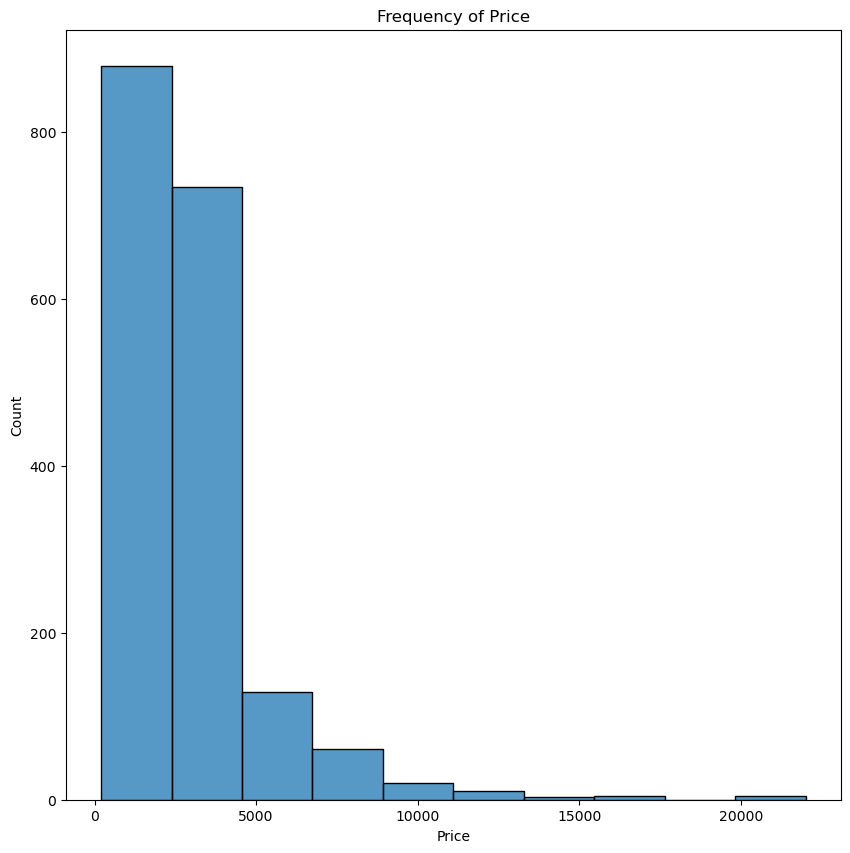

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(1,1,1)
plt.title('Frequency of Price')
sns.histplot(table_df['Price'],bins=10)

# The data has more items priced 0-2500 rupees.

<Axes: >

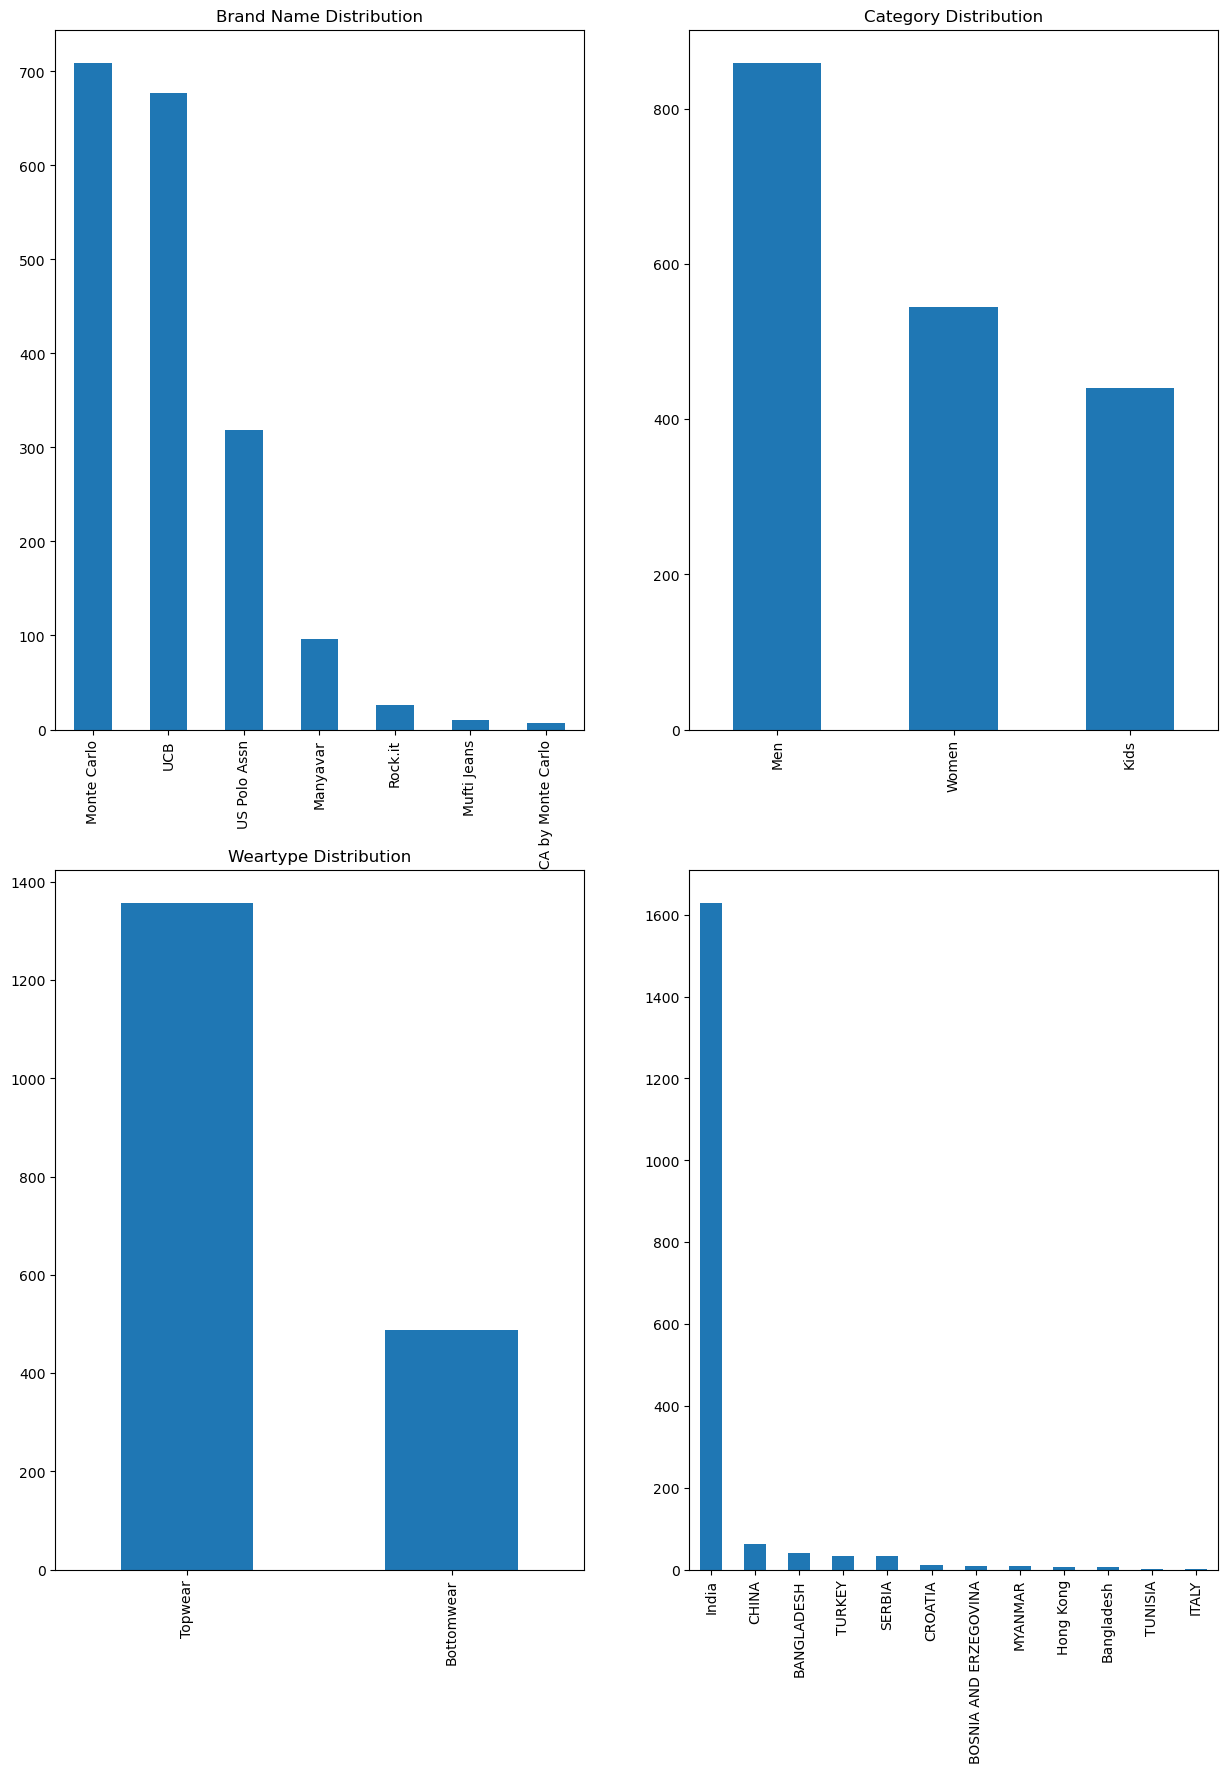

In [16]:
plt.figure(figsize=(15,20))
plt.subplot(2,2,1)
table_df['Brandname'].value_counts().plot.bar()
plt.title('Brand Name Distribution')
plt.subplot(2,2,2)
table_df['Category'].value_counts().plot.bar()
plt.title('Category Distribution')
plt.subplot(2,2,3)
table_df['Weartype'].value_counts().plot.bar()
plt.title('Weartype Distribution')
plt.subplot(2,2,4)
table_df['Country'].value_counts().plot.bar()

# More data for Monte Carlo brand,Men category topwear weartype,India country of origin 

Text(0.5, 1.0, 'Occasion Distribution')

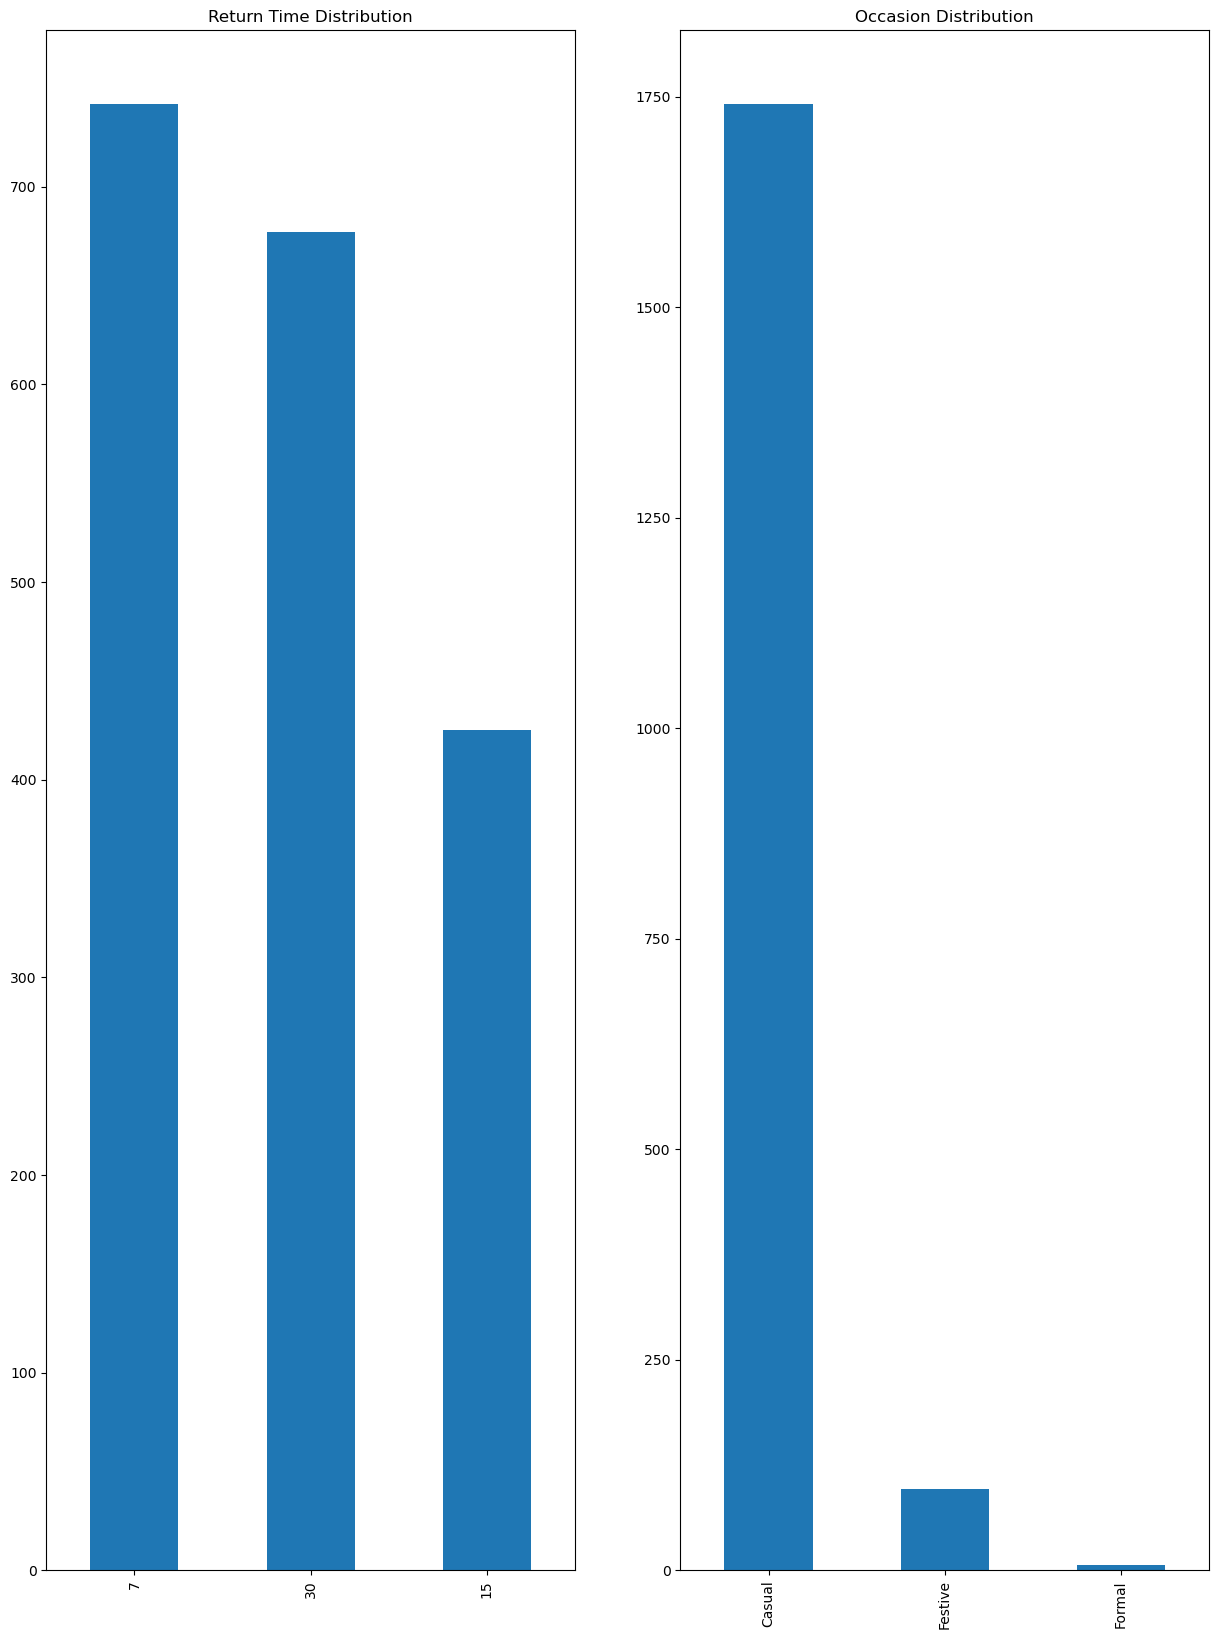

In [17]:
plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
table_df['return'].value_counts().plot.bar()
plt.title('Return Time Distribution')
plt.subplot(1,2,2)
table_df['Occasion'].value_counts().plot.bar()
plt.title('Occasion Distribution')

# More data with Casual, 7days return time

# Preprocessing

In [18]:
le=LabelEncoder()
for col in table_df.columns:
    if table_df[col].dtype=='object':
         table_df[col]=le.fit_transform(table_df[col])

# Price Prediction

In [20]:
# storing the Dependent Variables in X and Independent Variable in Y
x=table_df.drop(['Price'],axis=1)
y=table_df['Price']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_reg_train.shape,x_reg_test.shape,y_reg_train.shape,y_reg_test.shape

((1290, 13), (554, 13), (1290,), (554,))

In [21]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_reg_train=mmscaler.fit_transform(x_reg_train)
x_reg_test=mmscaler.fit_transform(x_reg_test)
x_reg_train=pd.DataFrame(x_reg_train)
x_reg_test=pd.DataFrame(x_reg_test)

In [22]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [23]:
# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [24]:
# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_reg_train, y_reg_train)
    
    # Predict the model with test data

    y_reg_pred = models.predict(x_reg_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis
    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_reg_test, y_reg_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_reg_test, y_reg_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_reg_test, y_reg_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_reg_test, y_reg_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_reg_test, y_reg_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_reg_test, y_reg_pred):
        y_reg_test, y_reg_pred = np.array(y_reg_test), np.array(y_reg_pred)
        return np.mean(np.abs((y_reg_test - y_reg_pred) / y_reg_test)) * 100
    
    # Evaluation of MAPE 
    result = MAPE(y_reg_test, y_reg_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_reg_test, y_reg_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_reg_test, y_reg_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_reg_test, y_reg_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_reg_test, y_reg_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_reg_test, y_reg_pred))),
               'R2_score' : metrics.r2_score(y_reg_test, y_reg_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 1017.612
Mean Squared Error (MSE): 2517219.168
Root Mean Squared Error (RMSE): 1586.575
R2_score: 0.392737
Root Mean Squared Log Error (RMSLE): 7.369
Mean Absolute Percentage Error (MAPE): 46.42 %
Adj R Square:  0.388423
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 321.057
Mean Squared Error (MSE): 588105.816
Root Mean Squared Error (RMSE): 766.881
R2_score: 0.858123
Root Mean Squared Log Error (RMSLE): 6.642
Mean Absolute Percentage Error (MAPE): 12.04 %
Adj R Square:  0.857115
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 265.938
Mean Squared Error (MSE): 242718.495
Root Mean Squared Error (RMSE): 492.665
R2_score: 0.941446
Root Mean Squared Log Error (RMSLE): 6.2
Mean Absolu

In [25]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.962270,216.006128,394.072972,9.111512,1.552935e+05,5.976536,0.962536
1,RandomForestRegressor,0.941030,265.938132,492.664688,10.439813,2.427185e+05,6.199829,0.941446
2,XGBRegressor,0.934422,274.737777,519.533490,11.277548,2.699150e+05,6.252931,0.934885
3,BaggingRegressor,0.934307,286.581318,519.990433,11.061807,2.703901e+05,6.253810,0.934770
4,GradientBoostingRegressor,0.906585,412.226055,620.074859,19.305657,3.844928e+05,6.429840,0.907244
5,DecisionTreeRegressor,0.857115,321.056859,766.880575,12.039672,5.881058e+05,6.642331,0.858123
6,KNeighborsRegressor,0.615710,562.360289,1257.663090,19.214741,1.581716e+06,7.137011,0.618421
7,Ridge Regression,0.389286,1012.767163,1585.454278,46.042260,2.513665e+06,7.368626,0.393594
8,Lasso Regression,0.388550,1017.265693,1586.410403,46.394091,2.516698e+06,7.369229,0.392863
9,LinearRegression,0.388423,1017.612340,1586.574665,46.416187,2.517219e+06,7.369333,0.392737


# From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are
1. ExtraTreesRegressor 2. RandomForestRegressor 3. XGBRegressor

# Occasion Prediction

In [27]:
# storing the Dependent Variables in X and Independent Variable in Y
x_class=table_df.drop(['Occasion'],axis=1)
y_class=table_df['Occasion']
x_class_train,x_class_test,y_class_train,y_class_test=train_test_split(x_class,y_class,test_size=0.30,random_state=42)

In [28]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_class_train=mmscaler.fit_transform(x_class_train)
x_class_test=mmscaler.fit_transform(x_class_test)
x_class_train=pd.DataFrame(x_class_train)
x_class_test=pd.DataFrame(x_class_test) 

In [29]:
a_class={'Model Name':[], 'Accuracy Score':[] ,'Precision Score':[] ,'Recall Score':[] ,'F1 Score':[]}
Results_class=pd.DataFrame(a_class)
Results_class.head()

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score


In [30]:
# Create objects of Regression / Regressor models with default hyper-parameters

modellog = LogisticRegression()
modeldtc = DecisionTreeClassifier()
modelbagc = BaggingClassifier()
modelrfc = RandomForestClassifier()
# modelSVC = SVC()
# modelXGC = xgb.XGBClassifier()
modelKNNC = KNeighborsClassifier(n_neighbors=5)
modelETC = ExtraTreesClassifier()

modelGBC = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [31]:
# Evalution matrix for all the algorithms

MM = [modellog, modeldtc, modelbagc, modelrfc, modelKNNC, modelETC,modelGBC]

for models in MM:
    print(models)
    # Fit the model with train data
    
    models.fit(x_class_train, y_class_train)
    
    # Predict the model with test data

    y_class_pred = models.predict(x_class_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis
    from sklearn import metrics

    print('Accuracy Score:', round(accuracy_score(y_class_test, y_class_pred),3))  
    print('Precision Score:', round(precision_score(y_class_test, y_class_pred,average='weighted'),3))  
    print('Recall Score:', round(recall_score(y_class_test, y_class_pred,average='weighted'),3))
    print('F1_Score:', round(f1_score(y_class_test, y_class_pred,average='weighted'),6))
#     print('Area Under Curve:', round(roc_auc_score(y_class_test, y_class_pred,multi_class='ovr'),3))
    
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Accuracy Score' : round(accuracy_score(y_class_test, y_class_pred),3),
               'Precision Score' : round(precision_score(y_class_test, y_class_pred,average='weighted'),3),
               'Recall Score' : round(recall_score(y_class_test, y_class_pred,average='weighted'),3),
               'F1 Score' : round(f1_score(y_class_test, y_class_pred,average='weighted'),6)
              }
    Results_class = Results_class.append(new_row, ignore_index=True)
    #------------------------------------------------------------

LogisticRegression()
Model Name:  LogisticRegression()
Accuracy Score: 0.996
Precision Score: 0.993
Recall Score: 0.996
F1_Score: 0.994588
------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier()
Model Name:  DecisionTreeClassifier()
Accuracy Score: 0.996
Precision Score: 0.996
Recall Score: 0.996
F1_Score: 0.99639
------------------------------------------------------------------------------------------------------------
BaggingClassifier()
Model Name:  BaggingClassifier()
Accuracy Score: 0.996
Precision Score: 0.996
Recall Score: 0.996
F1_Score: 0.99639
------------------------------------------------------------------------------------------------------------
RandomForestClassifier()
Model Name:  RandomForestClassifier()
Accuracy Score: 0.996
Precision Score: 0.993
Recall Score: 0.996
F1_Score: 0.994588
---------------------------------------------------------------------------------------------------------

In [32]:
models=['LogisticRegression','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','KNeighborsClassifier','ExtraTreesRegressor','GradientBoostingClassifier']
result_class=pd.DataFrame({'Model_Name':models})
result_class['Accuracy Score']=Results_class['Accuracy Score']
result_class['Recall Score']=Results_class['Recall Score']
result_class['Precision Score']=Results_class['Precision Score']
result_class['F1 Score']=Results_class['F1 Score']
result_class=result_class.sort_values(by='F1 Score',ascending=False).reset_index(drop=True)
result_class

,Model_Name,Accuracy Score,Recall Score,Precision Score,F1 Score
0,DecisionTreeClassifier,0.996,0.996,0.996,0.996390
1,BaggingClassifier,0.996,0.996,0.996,0.996390
2,GradientBoostingClassifier,0.995,0.995,0.996,0.995124
3,LogisticRegression,0.996,0.996,0.993,0.994588
4,RandomForestClassifier,0.996,0.996,0.993,0.994588
5,KNeighborsClassifier,0.996,0.996,0.993,0.994588
6,ExtraTreesRegressor,0.996,0.996,0.993,0.994588


# Decision Tree Classifier is the best model for classification.